<a href="https://colab.research.google.com/github/jonahyuan/AI-learning/blob/main/6_6%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 整理資料/資料預處理
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris["data"],columns=iris["feature_names"])
df["ans"] = iris["target"]
df.to_csv("iris.csv", encoding="utf-8",index=False)
df

In [6]:
# 切成兩份
# 資料整理用pandas，機器學習用numpy
import numpy as np
x = np.array(df.drop(["ans"], axis=1))
y = np.array(df["ans"])


In [9]:
# 大部分人會9:1/8:2切
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [40]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'petal width (cm) <= 0.75\ngini = 0.666\nsamples = 135\nvalue = [42, 47, 46]\nclass = versicolor'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 42\nvalue = [42, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 93\nvalue = [0, 47, 46]\nclass = versicolor'),
 Text(0.4, 0.16666666666666666, 'gini = 0.147\nsamples = 50\nvalue = [0, 46, 4]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.045\nsamples = 43\nvalue = [0, 1, 42]\nclass = virginica')]

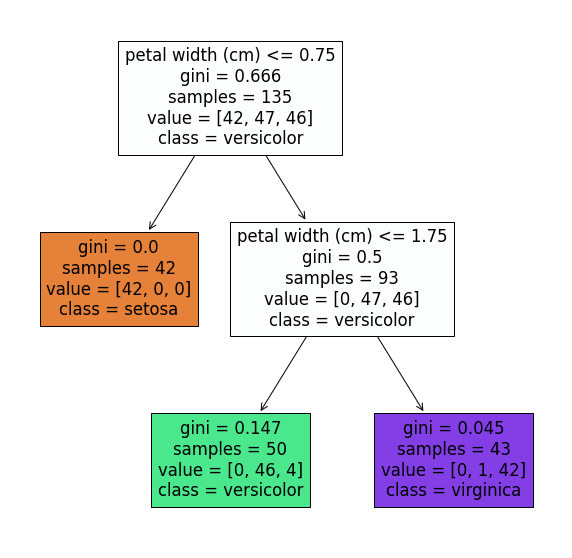

In [41]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 10))
plot_tree(clf, 
    feature_names=iris["feature_names"], 
    class_names=iris["target_names"], 
    filled=True)

In [42]:
# 驗證模型結果(回頭調整參數)
# 選擇評估標準:1.正確率 2.f1 score(imbalanced)
from sklearn.metrics import accuracy_score
pre = clf.predict(x_test)
accuracy_score(y_test, pre)

0.9333333333333333